In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [6]:
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ff24e6baf8056be4dc85dd0908e927


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rio grande
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | el retorno
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | nyurba
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | arman
Processing Record 14 of Set 1 | alta floresta
Processing Record 15 of Set 1 | mogzon
Processing Record 16 of Set 1 | kadoma
Processing Record 17 of Set 1 | porto murtinho
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | abonnema
Processing Record 22 of Set 1 | banchory
Processing Record 23 of 

Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | jarinu
Processing Record 42 of Set 4 | neiafu
Processing Record 43 of Set 4 | xiongzhou
Processing Record 44 of Set 4 | buala
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | palmerston
Processing Record 47 of Set 4 | mehamn
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | dukat
Processing Record 50 of Set 4 | mapastepec
Processing Record 1 of Set 5 | maebaru
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | tafresh
Processing Record 4 of Set 5 | hitachi
Processing Record 5 of Set 5 | grenville
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | leshan
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | ewa beach
Processing Record 11 of Set 5 | chimore
Processing Record 12 of Set 5 | baruun-urt
Processing Record 13 of Set 5 | mocuba
Processing Record 14 of Set 

Processing Record 31 of Set 8 | valley city
Processing Record 32 of Set 8 | sompeta
Processing Record 33 of Set 8 | fairhope
Processing Record 34 of Set 8 | sakakah
Processing Record 35 of Set 8 | maniitsoq
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | boa vista
Processing Record 39 of Set 8 | zhanaozen
Processing Record 40 of Set 8 | lodwar
Processing Record 41 of Set 8 | svirstroy
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | marathon
Processing Record 44 of Set 8 | gisborne
Processing Record 45 of Set 8 | heinola
Processing Record 46 of Set 8 | asmar
Processing Record 47 of Set 8 | amderma
City not found. Skipping...
Processing Record 48 of Set 8 | kings mountain
Processing Record 49 of Set 8 | biak
Processing Record 50 of Set 8 | ovre ardal
Processing Record 1 of Set 9 | esperance
Processing Record 2 of Set 9 | shelburne
Processing Record 3 of Set 9 | north ben

Processing Record 19 of Set 12 | pangkalanbuun
Processing Record 20 of Set 12 | waddan
Processing Record 21 of Set 12 | abu dhabi
Processing Record 22 of Set 12 | bhusawal
Processing Record 23 of Set 12 | hudson bay
Processing Record 24 of Set 12 | thonon-les-bains
Processing Record 25 of Set 12 | stabat
Processing Record 26 of Set 12 | alcudia
Processing Record 27 of Set 12 | rantauprapat
Processing Record 28 of Set 12 | oistins
Processing Record 29 of Set 12 | erzincan
Processing Record 30 of Set 12 | bodden town
Processing Record 31 of Set 12 | sibu
Processing Record 32 of Set 12 | ucluelet
Processing Record 33 of Set 12 | manzil tamim
City not found. Skipping...
Processing Record 34 of Set 12 | belyy yar
Processing Record 35 of Set 12 | kamaishi
Processing Record 36 of Set 12 | garoua
Processing Record 37 of Set 12 | hamilton
Processing Record 38 of Set 12 | salekhard
Processing Record 39 of Set 12 | jining
Processing Record 40 of Set 12 | seredka
Processing Record 41 of Set 12 | a

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Grande,-32.0350,-52.0986,46.51,75,51,24.14,BR,2021-07-28 19:25:18
1,Butaritari,3.0707,172.7902,82.44,71,47,10.36,KI,2021-07-28 19:28:54
2,Kaitangata,-46.2817,169.8464,41.32,95,26,4.47,NZ,2021-07-28 19:28:54
3,Kahului,20.8947,-156.4700,82.42,80,40,16.11,US,2021-07-28 19:24:11
4,El Retorno,2.3302,-72.6276,73.85,94,100,1.70,CO,2021-07-28 19:28:55
5,Bredasdorp,-34.5322,20.0403,55.27,62,0,9.22,ZA,2021-07-28 19:28:55
6,Nyurba,63.2842,118.3319,54.88,70,15,5.17,RU,2021-07-28 19:28:55
7,Mar Del Plata,-38.0023,-57.5575,47.08,63,75,3.00,AR,2021-07-28 19:28:56
8,Hambantota,6.1241,81.1185,80.13,79,99,17.09,LK,2021-07-28 19:28:56
9,Ribeira Grande,38.5167,-28.7000,77.40,65,20,12.66,PT,2021-07-28 19:28:56


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Grande,BR,2021-07-28 19:25:18,-32.0350,-52.0986,46.51,75,51,24.14
1,Butaritari,KI,2021-07-28 19:28:54,3.0707,172.7902,82.44,71,47,10.36
2,Kaitangata,NZ,2021-07-28 19:28:54,-46.2817,169.8464,41.32,95,26,4.47
3,Kahului,US,2021-07-28 19:24:11,20.8947,-156.4700,82.42,80,40,16.11
4,El Retorno,CO,2021-07-28 19:28:55,2.3302,-72.6276,73.85,94,100,1.70
...,...,...,...,...,...,...,...,...,...
583,Umea,SE,2021-07-28 19:31:53,63.8284,20.2597,75.13,43,0,6.91
584,Aberdeen,GB,2021-07-28 19:30:17,57.1437,-2.0981,61.48,95,40,4.61
585,Lasa,IT,2021-07-28 19:31:53,46.6166,10.7002,66.11,93,21,1.61
586,Limin Khersonisou,GR,2021-07-28 19:31:54,35.3162,25.3928,84.24,83,0,14.97


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

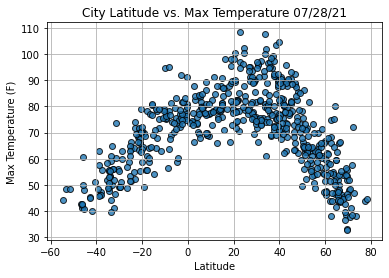

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

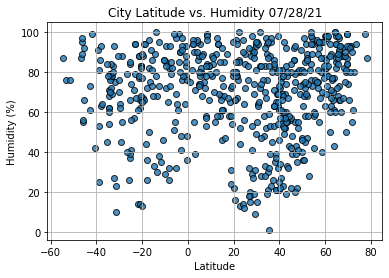

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

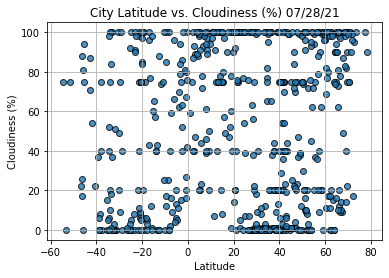

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

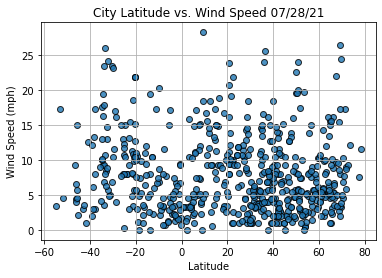

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                Alta Floresta
Country                        BR
Date          2021-07-28 19:28:58
Lat                       -9.8756
Lng                      -56.0861
Max Temp                    94.82
Humidity                       29
Cloudiness                      0
Wind Speed                   6.91
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
583     True
584     True
585     True
586     True
587     True
Name: Lat, Length: 588, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2021-07-28 19:28:54,3.0707,172.7902,82.44,71,47,10.36
3,Kahului,US,2021-07-28 19:24:11,20.8947,-156.4700,82.42,80,40,16.11
4,El Retorno,CO,2021-07-28 19:28:55,2.3302,-72.6276,73.85,94,100,1.70
6,Nyurba,RU,2021-07-28 19:28:55,63.2842,118.3319,54.88,70,15,5.17
8,Hambantota,LK,2021-07-28 19:28:56,6.1241,81.1185,80.13,79,99,17.09
...,...,...,...,...,...,...,...,...,...
583,Umea,SE,2021-07-28 19:31:53,63.8284,20.2597,75.13,43,0,6.91
584,Aberdeen,GB,2021-07-28 19:30:17,57.1437,-2.0981,61.48,95,40,4.61
585,Lasa,IT,2021-07-28 19:31:53,46.6166,10.7002,66.11,93,21,1.61
586,Limin Khersonisou,GR,2021-07-28 19:31:54,35.3162,25.3928,84.24,83,0,14.97


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2021-07-28 19:28:54,3.0707,172.7902,82.44,71,47,10.36
3,Kahului,US,2021-07-28 19:24:11,20.8947,-156.4700,82.42,80,40,16.11
4,El Retorno,CO,2021-07-28 19:28:55,2.3302,-72.6276,73.85,94,100,1.70
6,Nyurba,RU,2021-07-28 19:28:55,63.2842,118.3319,54.88,70,15,5.17
8,Hambantota,LK,2021-07-28 19:28:56,6.1241,81.1185,80.13,79,99,17.09


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

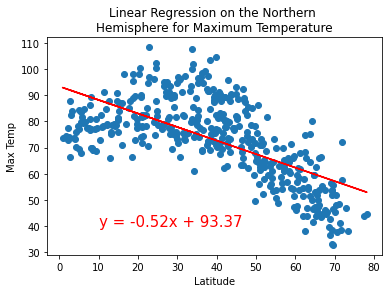

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern \nHemisphere for Maximum Temperature", "Max Temp",(10,40))

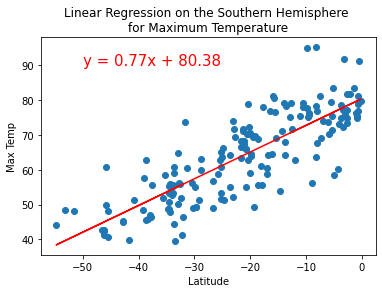

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

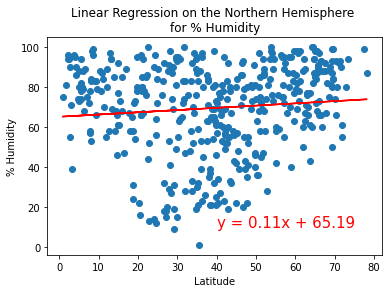

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

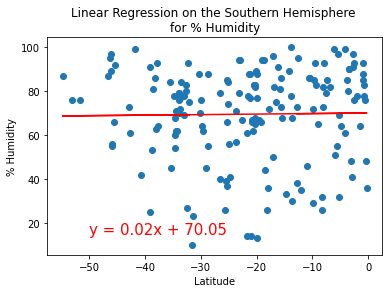

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

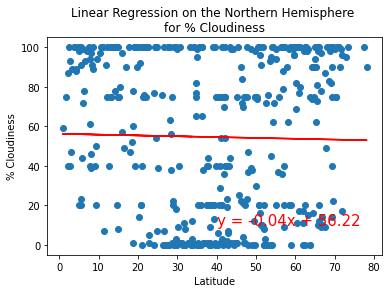

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

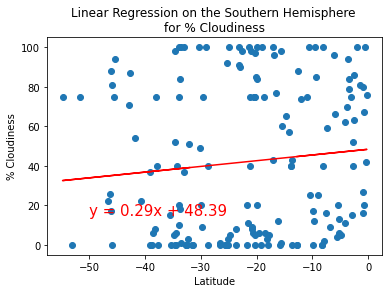

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

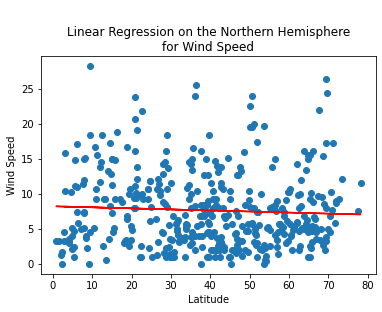

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

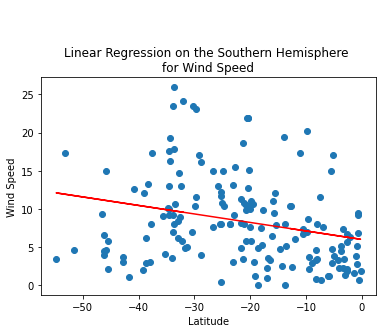

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))